<a href="https://colab.research.google.com/github/Rogerio-mack/Artigo-Atendimento/blob/main/Analise_Atendimento_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Arquivos Diários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
import pandas as pd

df1 = pd.read_excel('https://github.com/Rogerio-mack/Artigo-Atendimento/raw/main/data/Fluxo%20Ligacoes_2021p_2022_diario.xlsx',
                   sheet_name='2021 CI')
df2 = pd.read_excel('https://github.com/Rogerio-mack/Artigo-Atendimento/raw/main/data/Fluxo%20Ligacoes_2021p_2022_diario.xlsx',
                   sheet_name='2022 CI')
df = pd.concat([df1, df2])

display(df.head())
print(df.shape)

,Data,Vel Méd Atend,Tempo Méd Aban,Chams DAC,Tempo Méd DAC,Tempo Méd POS_AT,Chams Aban,Retdo Máx,Fluxo Entrada,Fluxo Saída,Chams Ramal Saída,Tempo Méd Ramal Saída,Chams Rvdas Fila,Tempo Méd Remv Fila,% Tempo DAC,% Chamadas Atendidas
0,Total,:18,02:19:00,20895,01:36:00,:00,1510,1900-01-07 12:50:00,181,184,13137,:09,0,0,18.38,92.50
1,2021-09-21 00:00:00,:15,01:28:00,267,01:45:00,:00,20,05:23:00,0,0,197,:16,0,0,18.64,93.03
2,2021-09-22 00:00:00,:12,:41,238,01:26:00,:00,20,02:56:00,26,26,131,:12,0,0,14.58,83.80
3,2021-09-23 00:00:00,:17,01:11:00,181,01:57:00,:00,26,03:25:00,26,26,160,:03,0,0,17.05,77.68
4,2021-09-24 00:00:00,:17,01:07:00,206,01:41:00,:00,18,02:45:00,2,2,143,:08,0,0,15.23,91.15


(305, 16)


In [3]:
df = df[['Data', 'Vel Méd Atend', 'Tempo Méd Aban', 'Chams DAC', 'Tempo Méd DAC',
       'Tempo Méd POS_AT', 'Chams Aban', 'Retdo Máx']]

df = df[df.Data != 'Total']

df.index = pd.to_datetime(df.Data)
df = df.drop(columns='Data')

for c in ['Vel Méd Atend', 'Tempo Méd Aban', 'Tempo Méd DAC','Tempo Méd POS_AT', 'Retdo Máx']:
  df[c] = df[c].astype('str')
  df[c] = df[c].apply(lambda x: '00' + x if len(x) == 5 else x)                 # :15:10> 00:15:10
  df[c] = df[c].apply(lambda x: '00:00' + x if len(x) == 3 else x)              # :10 > 00:00:10
  df[c] = df[c].apply(lambda x: '00:00:0' + x if len(x) == 1 else x)            # 0 > 00:00:00, just one case at 'Tempo Méd Aban'
  df[c] = df[c].apply(lambda x: x[-8::] if len(x) == 19 else x)                 # '1900-01-07 12:50:00' > 12:50:00, few cases at 'Retdo Máx' 

for c in ['Chams DAC', 'Chams Aban']:
  df[c] = df[c].astype('int')

for c in ['Vel Méd Atend', 'Tempo Méd Aban', 'Tempo Méd DAC','Tempo Méd POS_AT', 'Retdo Máx']:
  df[c] = pd.to_datetime(df[c],format='%H:%M:%S')

display(df.head())

,Vel Méd Atend,Tempo Méd Aban,Chams DAC,Tempo Méd DAC,Tempo Méd POS_AT,Chams Aban,Retdo Máx
Data,,,,,,,
2021-09-21,1900-01-01 00:00:15,1900-01-01 01:28:00,267,1900-01-01 01:45:00,1900-01-01,20,1900-01-01 05:23:00
2021-09-22,1900-01-01 00:00:12,1900-01-01 00:00:41,238,1900-01-01 01:26:00,1900-01-01,20,1900-01-01 02:56:00
2021-09-23,1900-01-01 00:00:17,1900-01-01 01:11:00,181,1900-01-01 01:57:00,1900-01-01,26,1900-01-01 03:25:00
2021-09-24,1900-01-01 00:00:17,1900-01-01 01:07:00,206,1900-01-01 01:41:00,1900-01-01,18,1900-01-01 02:45:00
2021-09-27,1900-01-01 00:00:32,1900-01-01 01:15:00,274,1900-01-01 01:53:00,1900-01-01,51,1900-01-01 07:50:00


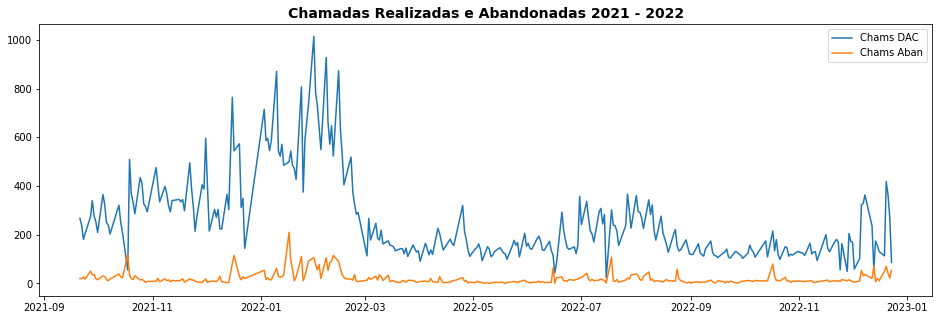

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
plt.plot(df.index, df['Chams DAC'],label='Chams DAC')
plt.plot(df.index, df['Chams Aban'],label='Chams Aban')
plt.title('Chamadas Realizadas e Abandonadas 2021 - 2022',weight='bold',fontsize=14)
plt.legend()
plt.show()

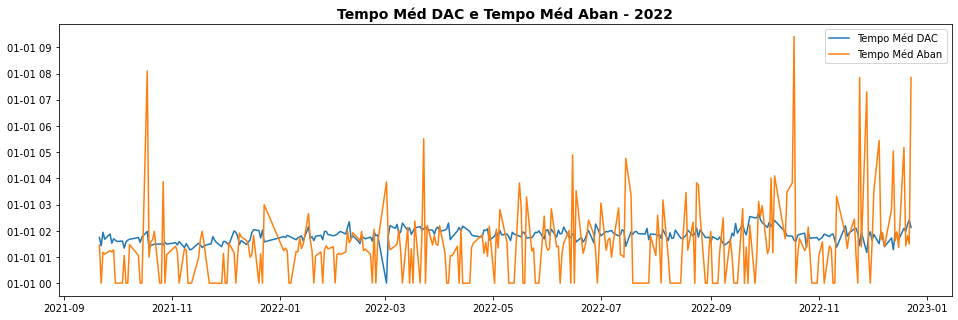

In [5]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Tempo Méd DAC'],label='Tempo Méd DAC')
plt.plot(df.index, df['Tempo Méd Aban'],label='Tempo Méd Aban')
plt.title('Tempo Méd DAC e Tempo Méd Aban - 2022',weight='bold',fontsize=14)
plt.legend()
plt.show()

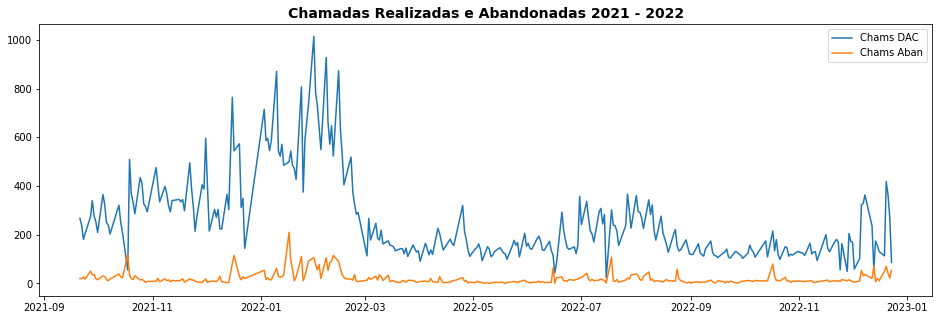

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
plt.plot(df.index, df['Chams DAC'],label='Chams DAC')
plt.plot(df.index, df['Chams Aban'],label='Chams Aban')
plt.title('Chamadas Realizadas e Abandonadas 2021 - 2022',weight='bold',fontsize=14)
plt.legend()
plt.show()

In [7]:
df['wday'] = df.index.weekday 
df['wday'] = df['wday'].replace([0,1,2,3,4,5,6],['seg','ter','qua','qui','sex','sab','dom'])
df['month'] = df.index.month
df['year'] = df.index.year

display(df.head())

,Vel Méd Atend,Tempo Méd Aban,Chams DAC,Tempo Méd DAC,Tempo Méd POS_AT,Chams Aban,Retdo Máx,wday,month,year
Data,,,,,,,,,,
2021-09-21,1900-01-01 00:00:15,1900-01-01 01:28:00,267,1900-01-01 01:45:00,1900-01-01,20,1900-01-01 05:23:00,ter,9,2021
2021-09-22,1900-01-01 00:00:12,1900-01-01 00:00:41,238,1900-01-01 01:26:00,1900-01-01,20,1900-01-01 02:56:00,qua,9,2021
2021-09-23,1900-01-01 00:00:17,1900-01-01 01:11:00,181,1900-01-01 01:57:00,1900-01-01,26,1900-01-01 03:25:00,qui,9,2021
2021-09-24,1900-01-01 00:00:17,1900-01-01 01:07:00,206,1900-01-01 01:41:00,1900-01-01,18,1900-01-01 02:45:00,sex,9,2021
2021-09-27,1900-01-01 00:00:32,1900-01-01 01:15:00,274,1900-01-01 01:53:00,1900-01-01,51,1900-01-01 07:50:00,seg,9,2021


In [8]:
for c in ['Vel Méd Atend', 'Tempo Méd Aban', 'Tempo Méd DAC','Tempo Méd POS_AT', 'Retdo Máx']:
  df[c + ' (s)'] = df[c].apply(lambda x: x.second + 60*x.minute + 60*60*x.hour)

display(df.head())

,Vel Méd Atend,Tempo Méd Aban,Chams DAC,Tempo Méd DAC,Tempo Méd POS_AT,Chams Aban,Retdo Máx,wday,month,year,Vel Méd Atend (s),Tempo Méd Aban (s),Tempo Méd DAC (s),Tempo Méd POS_AT (s),Retdo Máx (s)
Data,,,,,,,,,,,,,,,
2021-09-21,1900-01-01 00:00:15,1900-01-01 01:28:00,267,1900-01-01 01:45:00,1900-01-01,20,1900-01-01 05:23:00,ter,9,2021,15,5280,6300,0,19380
2021-09-22,1900-01-01 00:00:12,1900-01-01 00:00:41,238,1900-01-01 01:26:00,1900-01-01,20,1900-01-01 02:56:00,qua,9,2021,12,41,5160,0,10560
2021-09-23,1900-01-01 00:00:17,1900-01-01 01:11:00,181,1900-01-01 01:57:00,1900-01-01,26,1900-01-01 03:25:00,qui,9,2021,17,4260,7020,0,12300
2021-09-24,1900-01-01 00:00:17,1900-01-01 01:07:00,206,1900-01-01 01:41:00,1900-01-01,18,1900-01-01 02:45:00,sex,9,2021,17,4020,6060,0,9900
2021-09-27,1900-01-01 00:00:32,1900-01-01 01:15:00,274,1900-01-01 01:53:00,1900-01-01,51,1900-01-01 07:50:00,seg,9,2021,32,4500,6780,0,28200


In [9]:
df_m = df.resample('M').mean()

In [10]:
display(df_m.head())

,Chams DAC,Chams Aban,month,year,Vel Méd Atend (s),Tempo Méd Aban (s),Tempo Méd DAC (s),Tempo Méd POS_AT (s),Retdo Máx (s)
Data,,,,,,,,,
2021-09-30,254.500000,28.125000,9.0,2021.0,19.250000,3385.125000,6112.500000,0.000000,17332.500000
2021-10-31,300.421053,25.473684,10.0,2021.0,18.315789,4367.157895,5658.947368,0.000000,20962.105263
2021-11-30,354.526316,12.105263,11.0,2021.0,14.368421,2403.473684,5358.947368,0.000000,15953.684211
2021-12-31,377.352941,25.705882,12.0,2021.0,244.470588,3959.470588,6254.117647,0.000000,20640.000000
2022-01-31,601.190476,52.904762,1.0,2022.0,323.238095,4133.142857,6480.000000,0.047619,24545.714286


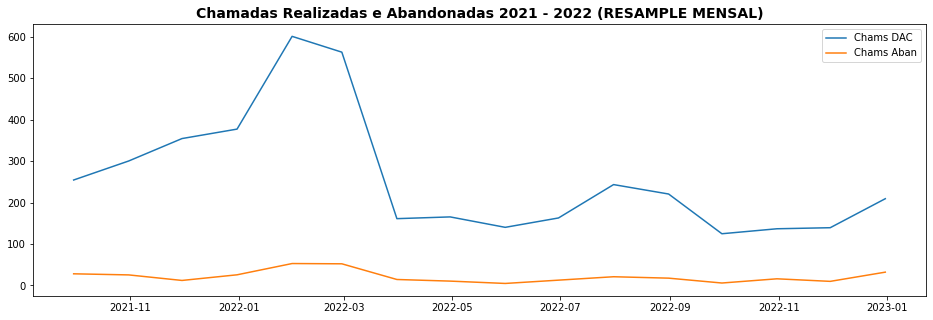

In [11]:
plt.figure(figsize=(16,5))
plt.plot(df_m.index, df_m['Chams DAC'],label='Chams DAC')
plt.plot(df_m.index, df_m['Chams Aban'],label='Chams Aban')
plt.title('Chamadas Realizadas e Abandonadas 2021 - 2022 (RESAMPLE MENSAL)',weight='bold',fontsize=14)
plt.legend()
plt.show()

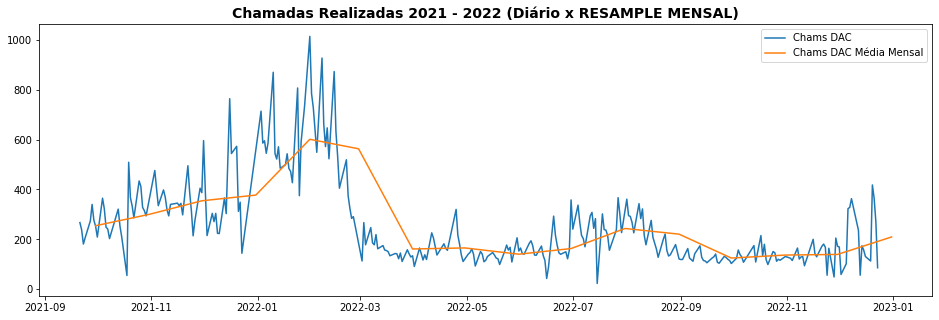

In [12]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Chams DAC'],label='Chams DAC')
plt.plot(df_m.index, df_m['Chams DAC'],label='Chams DAC Média Mensal')
plt.title('Chamadas Realizadas 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)
plt.legend()
plt.show()

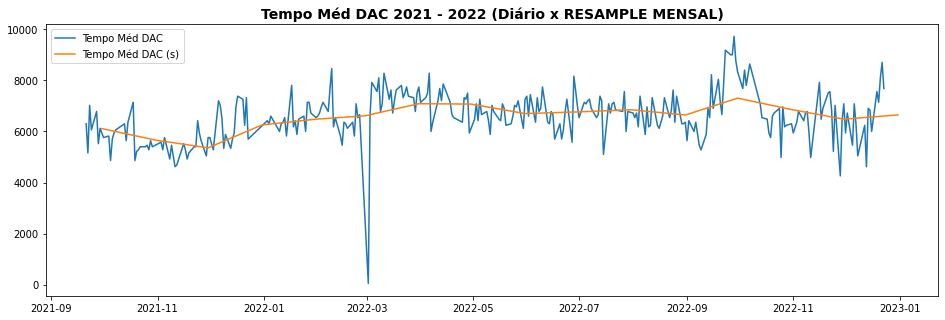

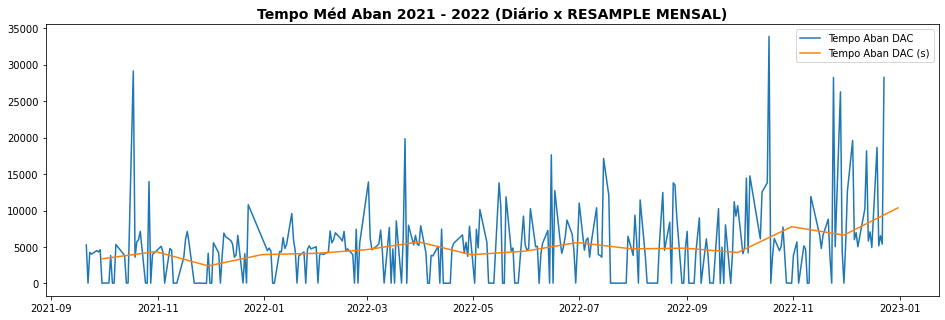

In [13]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Tempo Méd DAC (s)'],label='Tempo Méd DAC')
plt.plot(df_m.index, df_m['Tempo Méd DAC (s)'],label='Tempo Méd DAC (s)')
plt.title('Tempo Méd DAC 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.plot(df.index, df['Tempo Méd Aban (s)'],label='Tempo Aban DAC')
plt.plot(df_m.index, df_m['Tempo Méd Aban (s)'],label='Tempo Aban DAC (s)')
plt.title('Tempo Méd Aban 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)
plt.legend()
plt.show()



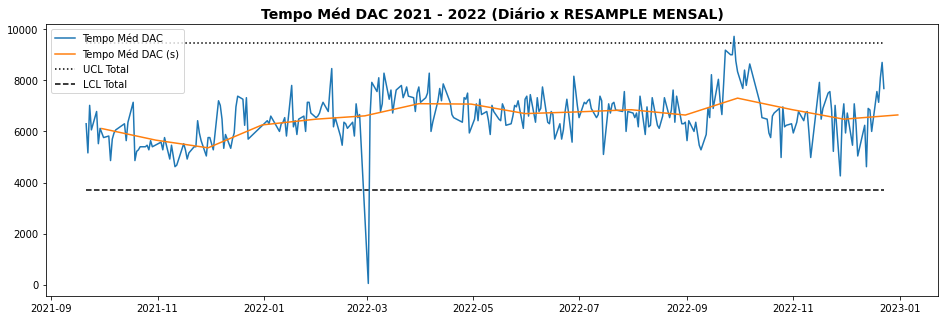

In [14]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Tempo Méd DAC (s)'],label='Tempo Méd DAC')
plt.plot(df_m.index, df_m['Tempo Méd DAC (s)'],label='Tempo Méd DAC (s)')
plt.title('Tempo Méd DAC 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)

plt.hlines(df['Tempo Méd DAC (s)'].mean() + 3*df['Tempo Méd DAC (s)'].std(), df.index.min(), df.index.max(), label='UCL Total', linestyle='dotted')
plt.hlines(df['Tempo Méd DAC (s)'].mean() - 3*df['Tempo Méd DAC (s)'].std(), df.index.min(), df.index.max(), label='LCL Total', linestyle='dashed')
plt.legend()
plt.show()





# Tempo Méd DAC (s) Final

In [15]:
df_std_month = pd.DataFrame( df.groupby(['month','year'])['Tempo Méd DAC (s)'].agg(['mean','std']) ).reset_index()

display(df_std_month.head())

,month,year,mean,std
0,1,2022,6480.000000,455.763096
1,2,2022,6609.473684,685.642227
2,3,2022,7085.090909,1631.916983
3,4,2022,7070.000000,637.725739
4,5,2022,6698.181818,391.281610


In [16]:
df_temp = df.merge(df_std_month, how='inner', on=['month','year'])

df['Tempo Méd DAC mean mensal'] = df_temp['mean'].values
df['Tempo Méd DAC std mensal'] = df_temp['std'].values
df.head()

,Vel Méd Atend,Tempo Méd Aban,Chams DAC,Tempo Méd DAC,Tempo Méd POS_AT,Chams Aban,Retdo Máx,wday,month,year,Vel Méd Atend (s),Tempo Méd Aban (s),Tempo Méd DAC (s),Tempo Méd POS_AT (s),Retdo Máx (s),Tempo Méd DAC mean mensal,Tempo Méd DAC std mensal
Data,,,,,,,,,,,,,,,,,
2021-09-21,1900-01-01 00:00:15,1900-01-01 01:28:00,267,1900-01-01 01:45:00,1900-01-01,20,1900-01-01 05:23:00,ter,9,2021,15,5280,6300,0,19380,6112.5,608.880706
2021-09-22,1900-01-01 00:00:12,1900-01-01 00:00:41,238,1900-01-01 01:26:00,1900-01-01,20,1900-01-01 02:56:00,qua,9,2021,12,41,5160,0,10560,6112.5,608.880706
2021-09-23,1900-01-01 00:00:17,1900-01-01 01:11:00,181,1900-01-01 01:57:00,1900-01-01,26,1900-01-01 03:25:00,qui,9,2021,17,4260,7020,0,12300,6112.5,608.880706
2021-09-24,1900-01-01 00:00:17,1900-01-01 01:07:00,206,1900-01-01 01:41:00,1900-01-01,18,1900-01-01 02:45:00,sex,9,2021,17,4020,6060,0,9900,6112.5,608.880706
2021-09-27,1900-01-01 00:00:32,1900-01-01 01:15:00,274,1900-01-01 01:53:00,1900-01-01,51,1900-01-01 07:50:00,seg,9,2021,32,4500,6780,0,28200,6112.5,608.880706


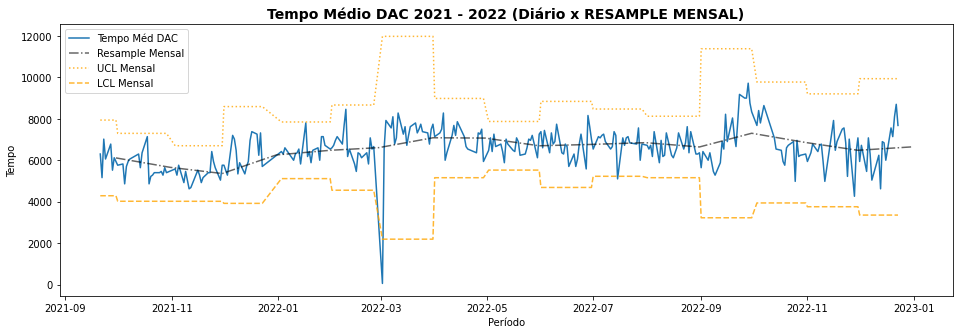

In [17]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Tempo Méd DAC (s)'],label='Tempo Méd DAC')
plt.plot(df_m.index, df_m['Tempo Méd DAC (s)'],label='Resample Mensal', linestyle='dashdot',color='black',alpha=0.6)
plt.title('Tempo Médio DAC 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)

plt.plot(df.index, df['Tempo Méd DAC mean mensal'] + 3*df['Tempo Méd DAC std mensal'], label='UCL Mensal', linestyle='dotted',color='orange',alpha=0.8)
plt.plot(df.index, df['Tempo Méd DAC mean mensal'] - 3*df['Tempo Méd DAC std mensal'], label='LCL Mensal', linestyle='dashed',color='orange',alpha=0.8)

plt.xlabel('Período')
plt.ylabel('Tempo')
plt.legend()
plt.show()

# Chams DAC Final

In [18]:
df_std_month = pd.DataFrame( df.groupby(['month','year'])['Chams DAC'].agg(['mean','std']) ).reset_index()

display(df_std_month.head())

,month,year,mean,std
0,1,2022,601.190476,153.741543
1,2,2022,563.052632,185.892882
2,3,2022,161.227273,40.051077
3,4,2022,165.444444,53.262085
4,5,2022,140.272727,26.576362


In [19]:
df_temp = df.merge(df_std_month, how='inner', on=['month','year'])

df['Chams DAC mean mensal'] = df_temp['mean'].values
df['Chams DAC std mensal'] = df_temp['std'].values
df.head()

,Vel Méd Atend,Tempo Méd Aban,Chams DAC,Tempo Méd DAC,Tempo Méd POS_AT,Chams Aban,Retdo Máx,wday,month,year,Vel Méd Atend (s),Tempo Méd Aban (s),Tempo Méd DAC (s),Tempo Méd POS_AT (s),Retdo Máx (s),Tempo Méd DAC mean mensal,Tempo Méd DAC std mensal,Chams DAC mean mensal,Chams DAC std mensal
Data,,,,,,,,,,,,,,,,,,,
2021-09-21,1900-01-01 00:00:15,1900-01-01 01:28:00,267,1900-01-01 01:45:00,1900-01-01,20,1900-01-01 05:23:00,ter,9,2021,15,5280,6300,0,19380,6112.5,608.880706,254.5,48.3765
2021-09-22,1900-01-01 00:00:12,1900-01-01 00:00:41,238,1900-01-01 01:26:00,1900-01-01,20,1900-01-01 02:56:00,qua,9,2021,12,41,5160,0,10560,6112.5,608.880706,254.5,48.3765
2021-09-23,1900-01-01 00:00:17,1900-01-01 01:11:00,181,1900-01-01 01:57:00,1900-01-01,26,1900-01-01 03:25:00,qui,9,2021,17,4260,7020,0,12300,6112.5,608.880706,254.5,48.3765
2021-09-24,1900-01-01 00:00:17,1900-01-01 01:07:00,206,1900-01-01 01:41:00,1900-01-01,18,1900-01-01 02:45:00,sex,9,2021,17,4020,6060,0,9900,6112.5,608.880706,254.5,48.3765
2021-09-27,1900-01-01 00:00:32,1900-01-01 01:15:00,274,1900-01-01 01:53:00,1900-01-01,51,1900-01-01 07:50:00,seg,9,2021,32,4500,6780,0,28200,6112.5,608.880706,254.5,48.3765


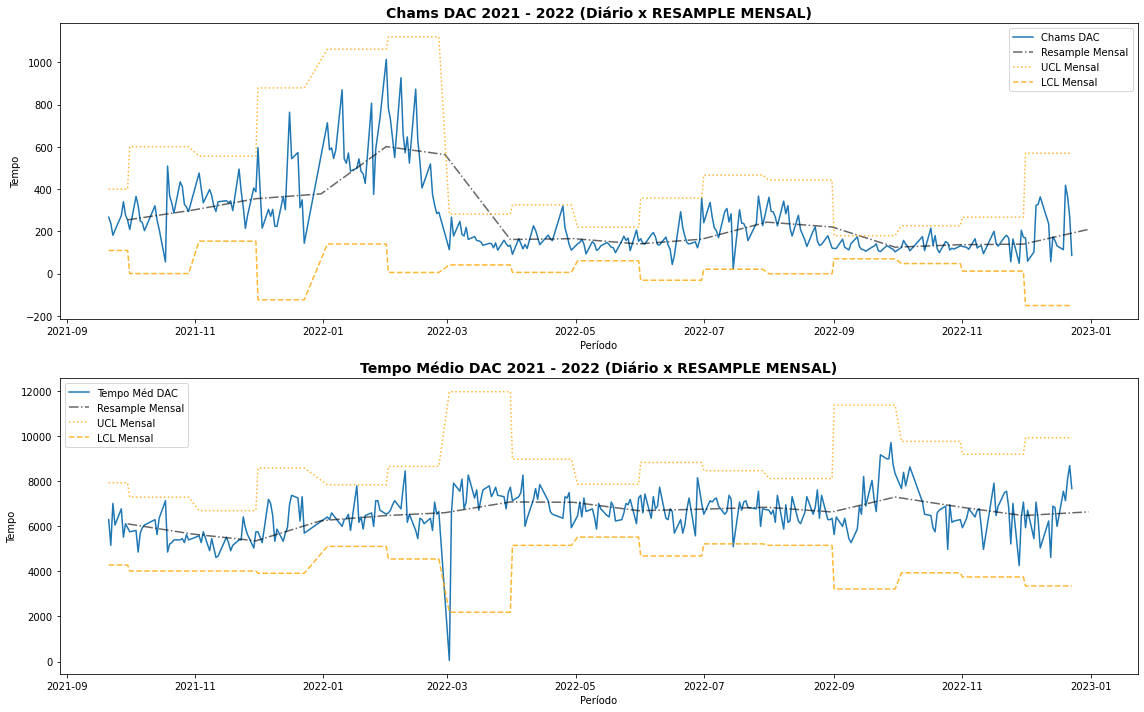

In [20]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
plt.plot(df.index, df['Chams DAC'],label='Chams DAC')
plt.plot(df_m.index, df_m['Chams DAC'],label='Resample Mensal', linestyle='dashdot',color='black',alpha=0.6)
plt.title('Chams DAC 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)

plt.plot(df.index, df['Chams DAC mean mensal'] + 3*df['Chams DAC std mensal'], label='UCL Mensal', linestyle='dotted',color='orange',alpha=0.8)
plt.plot(df.index, df['Chams DAC mean mensal'] - 3*df['Chams DAC std mensal'], label='LCL Mensal', linestyle='dashed',color='orange',alpha=0.8)

plt.xlabel('Período')
plt.ylabel('Tempo')
plt.legend()

plt.subplot(2,1,2)
plt.plot(df.index, df['Tempo Méd DAC (s)'],label='Tempo Méd DAC')
plt.plot(df_m.index, df_m['Tempo Méd DAC (s)'],label='Resample Mensal', linestyle='dashdot',color='black',alpha=0.6)
plt.title('Tempo Médio DAC 2021 - 2022 (Diário x RESAMPLE MENSAL)',weight='bold',fontsize=14)

plt.plot(df.index, df['Tempo Méd DAC mean mensal'] + 3*df['Tempo Méd DAC std mensal'], label='UCL Mensal', linestyle='dotted',color='orange',alpha=0.8)
plt.plot(df.index, df['Tempo Méd DAC mean mensal'] - 3*df['Tempo Méd DAC std mensal'], label='LCL Mensal', linestyle='dashed',color='orange',alpha=0.8)

plt.xlabel('Período')
plt.ylabel('Tempo')
plt.legend()

plt.tight_layout()
plt.show()

## Boxplot day of week

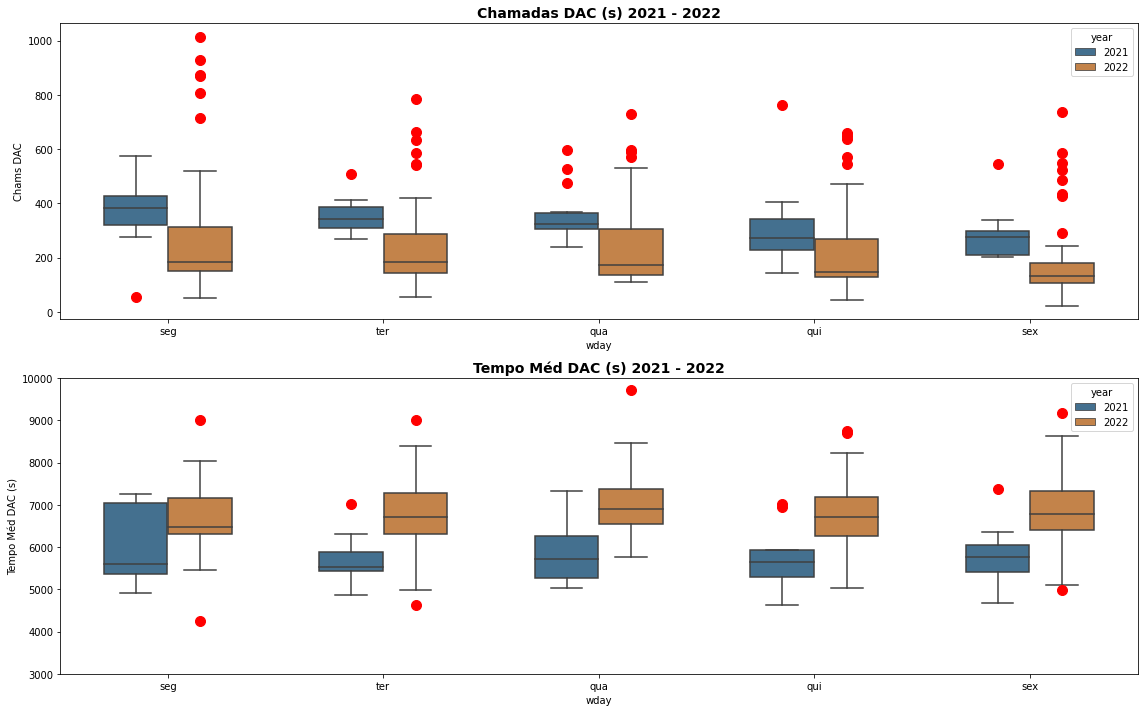

In [21]:
plt.figure(figsize=(16,10))

flierprops = dict(marker='o', markerfacecolor='red', markersize=10,  markeredgecolor='red')

plt.subplot(2,1,1)
sns.boxplot(data=df, x='wday', y='Chams DAC', hue='year', order=['seg','ter','qua','qui','sex'], width=0.6, saturation=0.5, flierprops=flierprops)
# seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
plt.title('Chamadas DAC (s) 2021 - 2022',weight='bold',fontsize=14)

plt.subplot(2,1,2)
sns.boxplot(data=df, x='wday', y='Tempo Méd DAC (s)', hue='year', order=['seg','ter','qua','qui','sex'], width=0.6, saturation=0.5, flierprops=flierprops)
# seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
plt.title('Tempo Méd DAC (s) 2021 - 2022',weight='bold',fontsize=14)
plt.ylim([3000,10000])



plt.tight_layout()
plt.show()

# Correlação

In [22]:
df[['Tempo Méd DAC (s)','Chams DAC']].corr()

,Tempo Méd DAC (s),Chams DAC
Tempo Méd DAC (s),1.000000,-0.162443
Chams DAC,-0.162443,1.000000


In [23]:
df[['Chams DAC','Chams Aban']].corr()

,Chams DAC,Chams Aban
Chams DAC,1.000000,0.606799
Chams Aban,0.606799,1.000000


# Análise dos Arquivos Horários

In [24]:
!wget https://github.com/Rogerio-mack/Artigo-Atendimento/raw/main/data/Fluxo%20Ligacoes_2020_horario.csv
!wget https://github.com/Rogerio-mack/Artigo-Atendimento/raw/main/data/Fluxo%20Ligacoes_2021_horario.csv

!cat "/content/Fluxo Ligacoes_2020_horario.csv" "/content/Fluxo Ligacoes_2021_horario.csv" > "Fluxo Ligacoes_2020_2021_horario.csv"

--2023-02-02 14:49:55--  https://github.com/Rogerio-mack/Artigo-Atendimento/raw/main/data/Fluxo%20Ligacoes_2020_horario.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rogerio-mack/Artigo-Atendimento/main/data/Fluxo%20Ligacoes_2020_horario.csv [following]
--2023-02-02 14:49:55--  https://raw.githubusercontent.com/Rogerio-mack/Artigo-Atendimento/main/data/Fluxo%20Ligacoes_2020_horario.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157794 (1.1M) [text/plain]
Saving to: ‘Fluxo Ligacoes_2020_horario.csv.1’

Fluxo Ligacoes_2020 100%[===================>]   1.10M  --.-KB/s    in 0.05s   

20

In [25]:
def is_header_date(rec):
  import re

  regex = '^\s*(3[01]|[12][0-9]|0?[1-9])\/(1[012]|0?[1-9])\/((?:19|20)\d{2})\s*  (Seg|Ter|Qua|Qui|Sex|Sab|Dom);;;;;.*$'
  p = re.compile(regex)

  if(re.search(p, rec)):
    # print("true")
    m = re.search(p, rec)
    return m.group(1,2,3,4)
  else:
    return False

rec = '16/01/2023  Seg;;;;;;;;;;;;;;;;;;'

if not is_header_date(rec):
  print('None')
else: print(is_header_date(rec)) 

if is_header_date(rec):
  print(is_header_date(rec)) 
else: print('None')

('16', '01', '2023', 'Seg')
('16', '01', '2023', 'Seg')


In [26]:
def is_time_rec(rec):
  import re

  regex = '^;(0[0-9]|1[0-9]|2[0-3]):([0-5][0-9]) - (0[0-9]|1[0-9]|2[0-3]):([0-5][0-9]).*$'
  p = re.compile(regex)

  if(re.search(p, rec)):
    # print("true")
    m = re.search(p, rec)
    return m.group(1,2,3,4)
  else:
    return False

rec = ';07:00 - 07:59;;0;00:00:00;0,00;51;00:26:12;0,00;0;00:00:00;0,00;51;;00:26:12;0,00;;;'

if not is_time_rec(rec):
  print('None')
else: print(is_time_rec(rec)) 

('07', '00', '07', '59')


In [27]:
time_serie = []
sem_serie = []
qde_ligacoes_serie = []
tempo_ligacoes_serie = []

for rec in open('/content/Fluxo Ligacoes_2020_2021_horario.csv', encoding="utf8", errors='ignore'):

  if is_header_date(rec):
    dia, mes, ano, sem = is_header_date(rec)
    dia_mes_ano = dia + '.' + mes + '.' + ano

  if is_time_rec(rec):
    hh, mm, _, _ = is_time_rec(rec)
    dia_mes_ano_hh_mm = dia_mes_ano + ' ' + hh + ':' + mm

    time_serie += [pd.to_datetime(dia_mes_ano_hh_mm, format='%d.%m.%Y %H:%M')]
    sem_serie += [sem]

    qde_ligacoes_serie.append(rec.split(';')[6])
    tempo_ligacoes_serie.append(rec.split(';')[7])

df = pd.DataFrame({'time': time_serie,
                  'sem': sem_serie,
                  'qde_ligacoes': qde_ligacoes_serie,
                  'tempo_ligacoes': tempo_ligacoes_serie})

df.qde_ligacoes = df.qde_ligacoes.apply(lambda x: x.replace('.',''))
df.qde_ligacoes = df.qde_ligacoes.astype('int')

df.set_index('time',inplace=True)
display(df)



,sem,qde_ligacoes,tempo_ligacoes
time,,,
2020-01-02 07:00:00,Qui,25,00:22:00
2020-01-02 08:00:00,Qui,488,09:09:12
2020-01-02 09:00:00,Qui,1481,23:08:36
2020-01-02 10:00:00,Qui,1754,35:30:18
2020-01-02 11:00:00,Qui,1761,33:43:48
...,...,...,...
2021-12-23 19:00:00,Qui,36,01:29:48
2021-12-23 20:00:00,Qui,7,00:19:36
2021-12-23 21:00:00,Qui,4,01:18:36


In [28]:
def is_MMSSmm_rec(rec):
  import re

  regex = '^([0-5][0-9]):([0-5][0-9]):([0-5][0-9])$'
  p = re.compile(regex)

  if(re.search(p, rec)):
    # print("true")
    m = re.search(p, rec)
    return m.group(1,2,3)
  else:
    return False

rec = '01:18:36'
is_MMSSmm_rec(rec)

('01', '18', '36')

In [29]:
# 'tempo_ligacoes' ['101:18:36'] !

df['tempo_ligacoes (s)'] = df['tempo_ligacoes'].apply(lambda x: int(x.split(':')[0])*60+int(x.split(':')[1])+int(x.split(':')[2])/60)


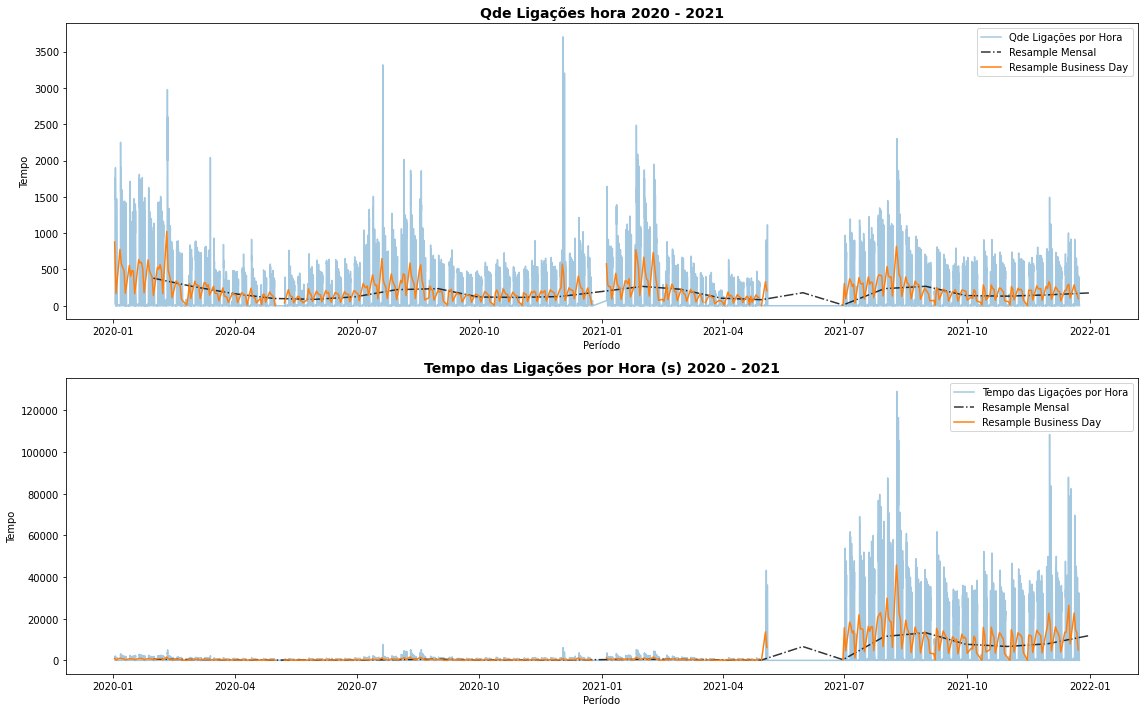

In [30]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
plt.plot(df.index, df.qde_ligacoes, label='Qde Ligações por Hora', alpha=0.4)
plt.plot(df.qde_ligacoes.resample('M').mean(), label='Resample Mensal', linestyle='dashdot',color='black',alpha=0.8)
plt.plot(df.qde_ligacoes.resample('B').mean(), label='Resample Business Day')
plt.title('Qde Ligações hora 2020 - 2021',weight='bold',fontsize=14)

plt.xlabel('Período')
plt.ylabel('Tempo')
plt.legend()

plt.subplot(2,1,2)
plt.plot(df.index, df['tempo_ligacoes (s)'], label='Tempo das Ligações por Hora', alpha=0.4)
plt.plot(df['tempo_ligacoes (s)'].resample('M').mean(), label='Resample Mensal', linestyle='dashdot',color='black',alpha=0.8)
plt.plot(df['tempo_ligacoes (s)'].resample('B').mean(), label='Resample Business Day')
plt.title('Tempo das Ligações por Hora (s) 2020 - 2021',weight='bold',fontsize=14)

plt.xlabel('Período')
plt.ylabel('Tempo')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

df.head()

,sem,qde_ligacoes,tempo_ligacoes,tempo_ligacoes (s),year,month,hour
time,,,,,,,
2020-01-02 07:00:00,Qui,25,00:22:00,22.0,2020,1,7
2020-01-02 08:00:00,Qui,488,09:09:12,549.2,2020,1,8
2020-01-02 09:00:00,Qui,1481,23:08:36,1388.6,2020,1,9
2020-01-02 10:00:00,Qui,1754,35:30:18,2130.3,2020,1,10
2020-01-02 11:00:00,Qui,1761,33:43:48,2023.8,2020,1,11


In [32]:
df.dtypes

sem                    object
qde_ligacoes            int64
tempo_ligacoes         object
tempo_ligacoes (s)    float64
year                    int64
month                   int64
hour                    int64
dtype: object

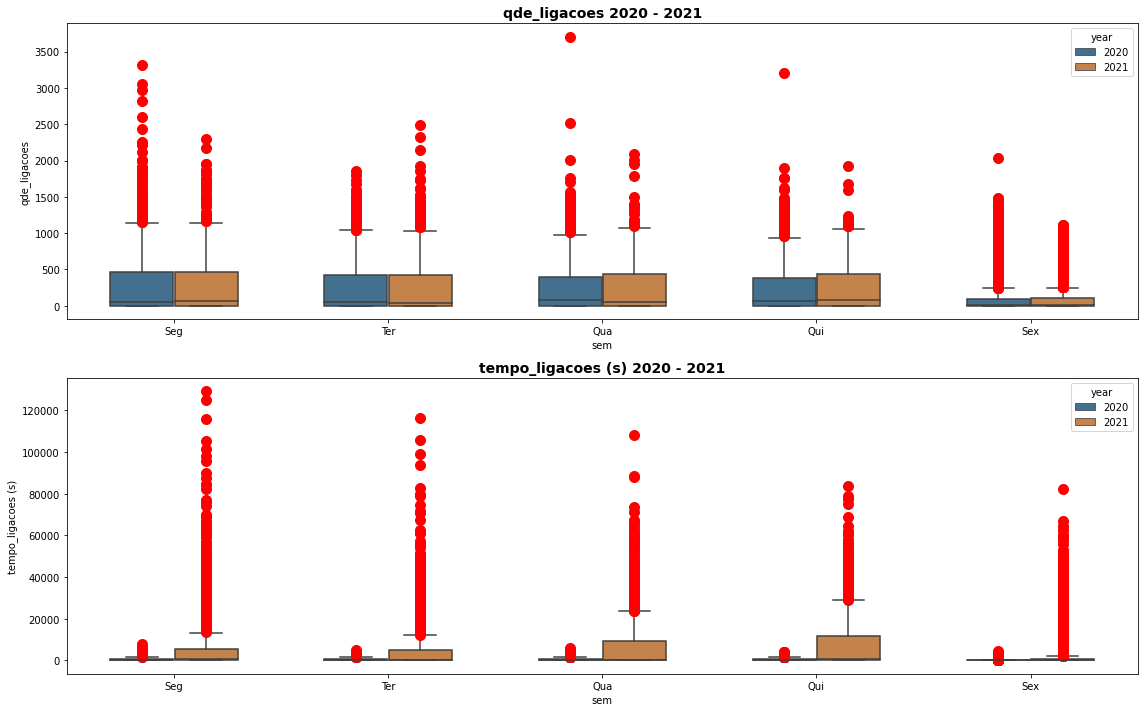

In [33]:
plt.figure(figsize=(16,10))

flierprops = dict(marker='o', markerfacecolor='red', markersize=10,  markeredgecolor='red')

plt.subplot(2,1,1)
sns.boxplot(data=df, x='sem', y='qde_ligacoes', hue='year', order=['Seg','Ter','Qua','Qui','Sex'], width=0.6, saturation=0.5, flierprops=flierprops)
# seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
plt.title('qde_ligacoes 2020 - 2021',weight='bold',fontsize=14)

plt.subplot(2,1,2)
sns.boxplot(data=df, x='sem', y='tempo_ligacoes (s)', hue='year', order=['Seg','Ter','Qua','Qui','Sex'], width=0.6, saturation=0.5, flierprops=flierprops)
# seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
plt.title('tempo_ligacoes (s) 2020 - 2021',weight='bold',fontsize=14)
# plt.ylim([3000,10000])



plt.tight_layout()
plt.show()

In [34]:
df.head()

,sem,qde_ligacoes,tempo_ligacoes,tempo_ligacoes (s),year,month,hour
time,,,,,,,
2020-01-02 07:00:00,Qui,25,00:22:00,22.0,2020,1,7
2020-01-02 08:00:00,Qui,488,09:09:12,549.2,2020,1,8
2020-01-02 09:00:00,Qui,1481,23:08:36,1388.6,2020,1,9
2020-01-02 10:00:00,Qui,1754,35:30:18,2130.3,2020,1,10
2020-01-02 11:00:00,Qui,1761,33:43:48,2023.8,2020,1,11


In [35]:
#@markdown `tspdecompose()`
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

In [36]:
df.head()

,sem,qde_ligacoes,tempo_ligacoes,tempo_ligacoes (s),year,month,hour
time,,,,,,,
2020-01-02 07:00:00,Qui,25,00:22:00,22.0,2020,1,7
2020-01-02 08:00:00,Qui,488,09:09:12,549.2,2020,1,8
2020-01-02 09:00:00,Qui,1481,23:08:36,1388.6,2020,1,9
2020-01-02 10:00:00,Qui,1754,35:30:18,2130.3,2020,1,10
2020-01-02 11:00:00,Qui,1761,33:43:48,2023.8,2020,1,11


In [37]:
df.columns

Index(['sem', 'qde_ligacoes', 'tempo_ligacoes', 'tempo_ligacoes (s)', 'year',
       'month', 'hour'],
      dtype='object')

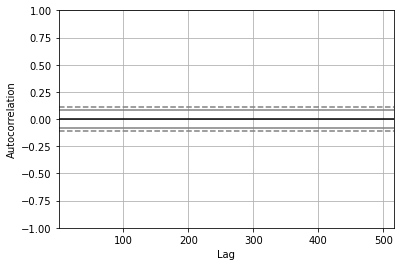

In [38]:
pd.plotting.autocorrelation_plot(df['qde_ligacoes'].resample("b").median())

In [40]:
df.dtypes

sem                    object
qde_ligacoes            int64
tempo_ligacoes         object
tempo_ligacoes (s)    float64
year                    int64
month                   int64
hour                    int64
dtype: object

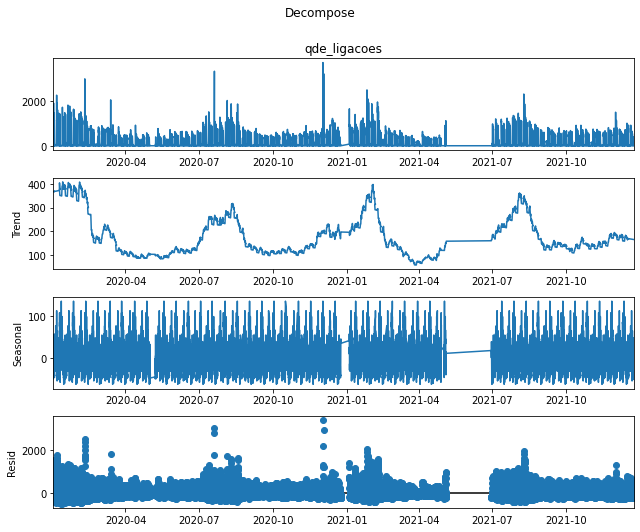

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(x=df['qde_ligacoes'], model='additive', extrapolate_trend='freq', period=365)

fig = decomp.plot()
fig.set_size_inches((9, 7))

plt.suptitle('Decompose',y=1.05)

plt.tight_layout()
plt.show()

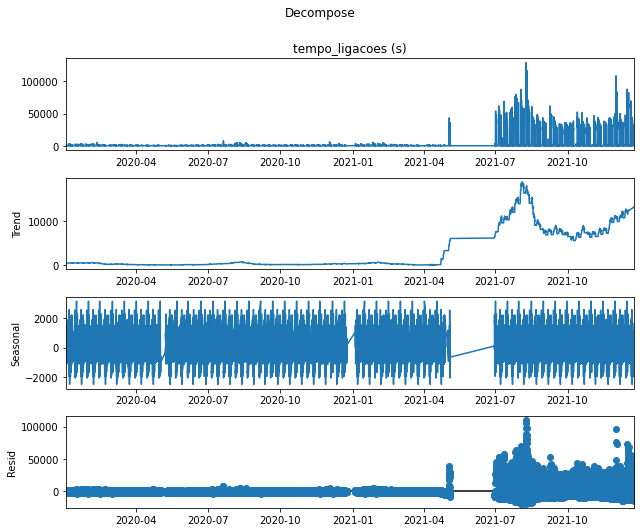

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(x=df['tempo_ligacoes (s)'], model='additive', extrapolate_trend='freq', period=365)

fig = decomp.plot()
fig.set_size_inches((9, 7))

plt.suptitle('Decompose',y=1.05)

plt.tight_layout()
plt.show()